In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''df = pd.read_csv("character-deaths.csv",encoding = "ISO-8859-1")
df.drop(df[pd.isna(df['Death Year'])].index, inplace= True)
df.to_csv("character-deaths_cut.csv", index = False)'''

'df = pd.read_csv("character-deaths.csv",encoding = "ISO-8859-1")\ndf.drop(df[pd.isna(df[\'Death Year\'])].index, inplace= True)\ndf.to_csv("character-deaths_cut.csv", index = False)'

In [2]:
df = pd.read_csv("deaths.csv")
df.sort_values(by = ['Book of Death', 'Death Chapter'], ascending = True , inplace = True)

In [3]:
num_chapter = {1: 72, 2: 69, 3: 81, 4: 45, 5: 72}
family = pd.Series(df.groupby('Allegiances').size().index)

In [4]:
house = {}
book = []
cnt = 0
for f in family:
    house[f] = cnt
    cnt+=1
curr_book = 1
curr_chap = 10
output = []
chap = [0 for x in range (12)]
for index, row in df.iterrows():
    if row['Death Chapter'] < curr_chap and row['Book of Death'] == curr_book:
        chap[house[row['Allegiances']]] += 1
        continue
    while row['Death Chapter'] > curr_chap or  row['Book of Death'] > curr_book:
        output.append(chap)
        if curr_chap > num_chapter[curr_book]:
            book.append(pd.DataFrame(output, columns=family))
            curr_chap = 10
            curr_book += 1
            output = []
        else:
            curr_chap += 10
        chap = [0 for x in range (12)]
    chap[house[row['Allegiances']]] += 1
output.append(chap)
book.append(pd.DataFrame(output, columns=family))

In [5]:
for i in range(5):
    book[i]['Book'] = i+1
    book[i]['Chapter'] =list(range(10, num_chapter[i+1]+10, 10))
    book[i].set_index(['Book','Chapter'],inplace = True)

In [57]:

#def generate_color():
    #color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(128, 255), range(3)))
#    return ("#%06x" % np.random.randint(0, 0xFFFFFF))
colors = ['red','blue','pink','brown','lime', 'cyan', 'grey','green', 'yellow', 'fuchsia', 'tan', 'navy']

#for i in range(12):
#    colors.append(generate_color())

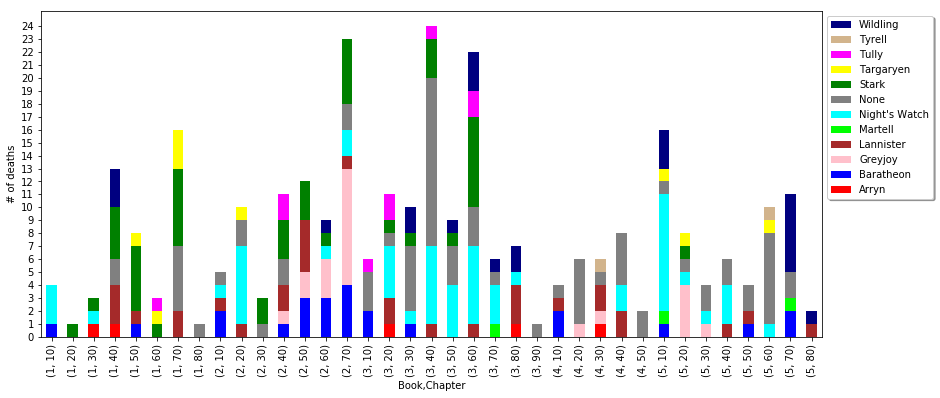

In [63]:
df_all = pd.concat([book[0],book[1],book[2],book[3],book[4]])
ax = df_all.plot(kind = 'bar', stacked='True',color = colors,figsize = (14,6))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1, 1), shadow=True)
ax.set_ylabel('# of deaths')
plt.yticks(list(range(0,25,1)))
plt.savefig('deaths.png',dpi = 300, bbox_inches='tight')
plt.show()

In [8]:
'''for i in range(5):
    for col in book[i].keys():
        if book[i][col].sum() == 0:
            del book[i][col]'''

'for i in range(5):\n    for col in book[i].keys():\n        if book[i][col].sum() == 0:\n            del book[i][col]'

In [105]:
"""fig, axes = plt.subplots(5, 1, figsize = (8,26))

for i in range(5):
    book[i].plot(ax = axes[i], kind = 'bar', stacked='True',color = colors, align = 'center');
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(reversed(handles), reversed(labels),bbox_to_anchor=(1, 1), shadow=True)
    axes[i].set_xlabel('Chapter')
    axes[i].set_ylabel('# of deaths')
    axes[i].set_title('Book%d' % (i+1))
    axes[i].tight_layout()
#plt.savefig('deaths.png',dpi = 300, bbox_inches='tight')
#plt.tight_layout()
plt.show()"""

AttributeError: 'AxesSubplot' object has no attribute 'tight_layout'